In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
# cancer

In [4]:
#### feature를 컬럼으로 DataFrame 생성

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0
## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
## 학습시킴
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 0)
forest = RandomForestClassifier(n_estimators=100, random_state= 0)# 디폴트 = 10
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [6]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print('Training DataSet Accuracy {:.3f}'.format(forest.score(X_train, y_train))) 
print('Test DataSet Accuracy {:.3f}'.format( forest.score(X_test, y_test)))

Training DataSet Accuracy 1.000
Test DataSet Accuracy 0.965


In [7]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=?
## max_depth=?
X = cancer.data[:,[0,1]]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

forest2 = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=5,random_state= 0)
forest2.fit(X_train, y_train)
display(forest2.score(X_train, y_train), forest2.score(X_test, y_test))

0.931924882629108

0.916083916083916

In [8]:
# 특성 중요도 출력하기
print('특성 중요도:\n{}'.format(forest2.feature_importances_))

특성 중요도:
[0.80121794 0.19878206]


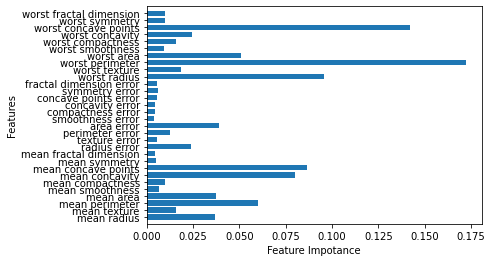

In [9]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # 30..특성의 갯수
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

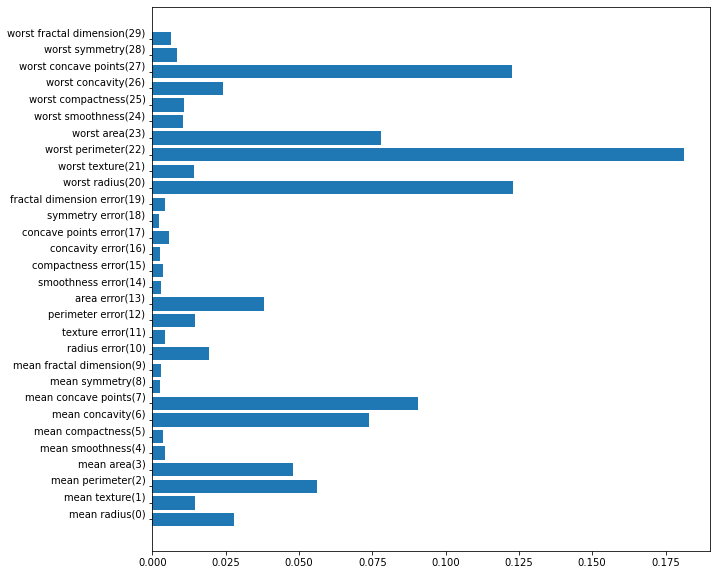

In [10]:
forest2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0) #디폴트는 10
forest2.fit(cancer.data, cancer.target)

n_features = cancer.data.shape[1]

weight = forest2.feature_importances_

plt.figure(figsize=[10,10])
plt.barh(range(n_features),weight)
plt.yticks(range(n_features), ['%s(%d)' %(s,i) for i,s in enumerate(cancer.feature_names)], va='bottom')
print('')

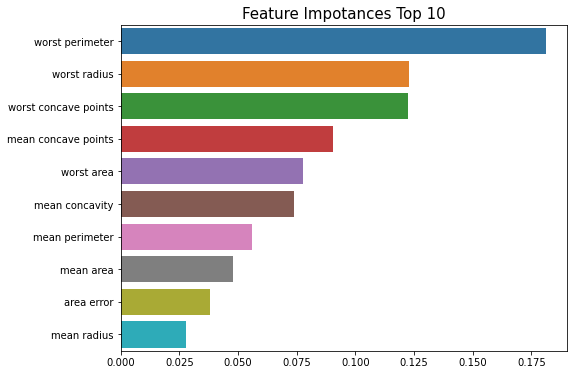

In [11]:
# 중요도 순으로 졍렬해서 시각화
import seaborn as sns
weight_values = forest2.feature_importances_
weight = pd.Series(weight_values, index=cancer.feature_names)
weight_top10 = weight.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature Impotances Top 10', fontsize=15)
sns.barplot(x=weight_top10, y=weight_top10.index)
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자

max_depths = [1,3,4,6,10,15]
for depth in max_depths:
    model = RandomForestClassifier(max_depth=  depth, random_state = 0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth={0} 정확도 :{1:.4f}'.format(depth, accuracy))

max_depth=1 정확도 :0.9231
max_depth=3 정확도 :0.9231
max_depth=4 정확도 :0.8951
max_depth=6 정확도 :0.9021
max_depth=10 정확도 :0.9021
max_depth=15 정확도 :0.9021
